In [13]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [38]:
import seaborn as sns

In [39]:
import pandas as pd

In [40]:
from scipy.stats import pearsonr

In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [50]:
stats_df = pd.read_csv('team_stats_2003_2023.csv')
stats_df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


In [1]:
browser = webdriver.Chrome()
browser.maximize_window()

all_ranks = []
all_teams = []
all_contracts = []  
all_contract_values = []  
all_years = []

start_year = 2011
end_year = 2025

for year in range(start_year, end_year + 1):
    print(f"Scraping data for year: {year}")
    url = f"https://www.spotrac.com/nfl/free-agents/team/_/year/{year}" 
    browser.get(url)
    time.sleep(random.uniform(2, 4)) 

    try:
        table = WebDriverWait(browser, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '.dt-container.dt-empty-footer')) 
        )
        
        rows = table.find_elements(By.TAG_NAME, 'tr') 

        for row in rows[1:]:  
            cells = row.find_elements(By.TAG_NAME, 'td')  
            if len(cells) > 3:  
                all_ranks.append(cells[0].text)  
                all_teams.append(cells[1].text) 
                all_contracts.append(cells[2].text)  
                all_contract_values.append(cells[3].text)  
                all_years.append(year)  

    except Exception as e:
        print(f"Error during scraping for year {year}: {e}")

browser.quit()

nfl_table = pd.DataFrame({
    'Year': all_years,
    'Rank': all_ranks,
    'Team': all_teams,
    'All Contracts': all_contracts,  
    'All Contract Values': all_contract_values  
})

print(nfl_table)
nfl_table.to_csv('nfl_table_all_years.csv', index=False)  

Scraping data for year: 2011
Scraping data for year: 2012
Scraping data for year: 2013
Scraping data for year: 2014
Scraping data for year: 2015
Scraping data for year: 2016
Scraping data for year: 2017
Scraping data for year: 2018
Scraping data for year: 2019
Scraping data for year: 2020
Scraping data for year: 2021
Scraping data for year: 2022
Scraping data for year: 2023
Scraping data for year: 2024
Scraping data for year: 2025
     Year Rank Team All Contracts All Contract Values
0    2011    1  CAR             3        $141,000,000
1    2011    2  SEA             9        $110,185,000
2    2011    3  NYJ             5         $98,052,280
3    2011    4  ARI            13         $85,065,000
4    2011    5  NYG             8         $51,140,000
..    ...  ...  ...           ...                 ...
475  2025   28  DAL            11         $39,002,500
476  2025   29  PIT            12         $49,085,000
477  2025   30  BAL             7         $19,797,500
478  2025   31  CIN      

In [2]:
display(nfl_table)

,Year,Rank,Team,All Contracts,All Contract Values
0,2011,1,CAR,3,"$141,000,000"
1,2011,2,SEA,9,"$110,185,000"
2,2011,3,NYJ,5,"$98,052,280"
3,2011,4,ARI,13,"$85,065,000"
4,2011,5,NYG,8,"$51,140,000"
...,...,...,...,...,...
475,2025,28,DAL,11,"$39,002,500"
476,2025,29,PIT,12,"$49,085,000"
477,2025,30,BAL,7,"$19,797,500"
478,2025,31,CIN,7,"$34,045,000"


In [14]:
df1 = pd.read_csv("nfl_table_all_years.csv")
df2 = pd.read_csv("team_stats_2003_2023.csv")
df1.rename(columns={"Year": "year", "Team": "team"}, inplace=True)

team_name_mapping = {
    "ARI": "Arizona Cardinals", "ATL": "Atlanta Falcons", "BAL": "Baltimore Ravens", 
    "BUF": "Buffalo Bills", "CAR": "Carolina Panthers", "CHI": "Chicago Bears", 
    "CIN": "Cincinnati Bengals", "CLE": "Cleveland Browns", "DAL": "Dallas Cowboys", 
    "DEN": "Denver Broncos", "DET": "Detroit Lions", "GB": "Green Bay Packers",
    "HOU": "Houston Texans", "IND": "Indianapolis Colts", "JAX": "Jacksonville Jaguars", 
    "KC": "Kansas City Chiefs", "LAC": "Los Angeles Chargers", "LAR": "Los Angeles Rams", 
    "LV": "Las Vegas Raiders", "MIA": "Miami Dolphins", "MIN": "Minnesota Vikings", 
    "NE": "New England Patriots", "NO": "New Orleans Saints", "NYG": "New York Giants", 
    "NYJ": "New York Jets", "OAK": "Oakland Raiders", "PHI": "Philadelphia Eagles", 
    "PIT": "Pittsburgh Steelers", "SD": "San Diego Chargers", "SEA": "Seattle Seahawks", 
    "SF": "San Francisco 49ers", "STL": "St. Louis Rams", "TB": "Tampa Bay Buccaneers", 
    "TEN": "Tennessee Titans", "WAS": "Washington Commanders"
}

df1["team"] = df1["team"].map(team_name_mapping)

merged_df = pd.merge(df1, df2, on=["year", "team"], how="inner")
merged_df.head()

,year,Rank,team,All Contracts,All Contract Values,wins,losses,win_loss_perc,points,points_opp,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2011,1,Carolina Panthers,3,"$141,000,000",6,10,0.375,406,429,...,26,5.4,139,113,1013,31,38.5,12.8,39.94,NaN
1,2011,2,Seattle Seahawks,9,"$110,185,000",7,9,0.438,321,315,...,15,4.0,89,138,1047,23,27.8,11.6,-137.47,NaN
2,2011,3,New York Jets,5,"$98,052,280",8,8,0.500,377,363,...,14,3.8,92,102,849,36,29.6,13.8,-156.90,NaN
3,2011,4,Arizona Cardinals,13,"$85,065,000",8,8,0.500,312,348,...,12,4.2,83,106,1004,28,26.1,15.6,-98.26,NaN
4,2011,5,New York Giants,8,"$51,140,000",9,7,0.563,394,400,...,17,3.5,84,94,795,31,32.5,11.5,-45.79,NaN


In [16]:
merged_df.to_csv("merged_nfl_data.csv", index=False)
print("successful")

successful


In [8]:
merged_df.dtypes

year                      int64
Rank                      int64
team                     object
All Contracts             int64
All Contract Values      object
wins                      int64
losses                    int64
win_loss_perc           float64
points                    int64
points_opp                int64
points_diff               int64
mov                     float64
g                         int64
total_yards               int64
plays_offense             int64
yds_per_play_offense    float64
turnovers                 int64
fumbles_lost              int64
first_down                int64
pass_cmp                  int64
pass_att                  int64
pass_yds                  int64
pass_td                   int64
pass_int                  int64
pass_net_yds_per_att    float64
pass_fd                   int64
rush_att                  int64
rush_yds                  int64
rush_td                   int64
rush_yds_per_att        float64
rush_fd                   int64
penaltie

In [17]:
merged_df["Rank"] = merged_df["Rank"].astype("category")
merged_df["All Contracts"] = merged_df["All Contracts"].astype("category")
merged_df["g"] = merged_df["g"].astype("category")

merged_df.dtypes

year                       int64
Rank                    category
team                      object
All Contracts           category
All Contract Values       object
wins                       int64
losses                     int64
win_loss_perc            float64
points                     int64
points_opp                 int64
points_diff                int64
mov                      float64
g                       category
total_yards                int64
plays_offense              int64
yds_per_play_offense     float64
turnovers                  int64
fumbles_lost               int64
first_down                 int64
pass_cmp                   int64
pass_att                   int64
pass_yds                   int64
pass_td                    int64
pass_int                   int64
pass_net_yds_per_att     float64
pass_fd                    int64
rush_att                   int64
rush_yds                   int64
rush_td                    int64
rush_yds_per_att         float64
rush_fd   

In [10]:
field_descriptions = {
    "year": "The season year",
    "Rank": "Team ranking based on contracts or performance",
    "team": "Team name",
    "All Contracts": "Number of contracts signed by the team",
    "All Contract Values": "Total value of all contracts signed",
    "wins": "Total games won in the season",
    "losses": "Total games lost in the season",
    "win_loss_perc": "Winning percentage (wins / total games)",
    "points": "Total points scored by the team",
    "points_opp": "Total points allowed to opponents",
    "points_diff": "Difference between points scored and allowed",
    "g": "Number of games played",
    "total_yards": "Total offensive yards gained",
    "plays_offense": "Total offensive plays run",
    "yds_per_play_offense": "Average yards gained per offensive play",
    "turnovers": "Total turnovers committed",
    "fumbles_lost": "Number of fumbles lost",
    "first_down": "Total first downs earned",
    "pass_cmp": "Total completed passes",
    "pass_att": "Total pass attempts",
    "pass_yds": "Total passing yards",
    "pass_td": "Total passing touchdowns",
    "pass_int": "Total interceptions thrown",
    "pass_net_yds_per_att": "Net passing yards per attempt",
    "pass_fd": "First downs gained via passing",
    "rush_att": "Total rushing attempts",
    "rush_yds": "Total rushing yards",
    "rush_td": "Total rushing touchdowns",
    "rush_yds_per_att": "Average rushing yards per attempt",
    "rush_fd": "First downs gained via rushing",
    "penalties": "Total penalties committed",
    "penalties_yds": "Total yards lost due to penalties",
    "pen_fd": "First downs gained via penalties",
    "score_pct": "Percentage of offensive drives resulting in a score",
    "turnover_pct": "Percentage of offensive drives ending in a turnover",
    "exp_pts_tot": "Expected Points Contributed by Offense",
    "super_bowl_winner": "Winner for This Season"
}

data_types = merged_df.dtypes.astype(str)  
table_df = pd.DataFrame({
    "Field": data_types.index,
    "Type": data_types.values,
    "Description": [field_descriptions[col] for col in data_types.index]
})

pd.set_option("display.max_columns", None)  
pd.set_option("display.max_rows", None)    
pd.set_option("display.max_colwidth", None) 
pd.set_option("display.width", 1000)        

table_df

,Field,Type,Description
0,year,int64,The season year
1,Rank,int64,Team ranking based on contracts or performance
2,team,object,Team name
3,All Contracts,int64,Number of contracts signed by the team
4,All Contract Values,object,Total value of all contracts signed
5,wins,int64,Total games won in the season
6,losses,int64,Total games lost in the season
7,win_loss_perc,float64,Winning percentage (wins / total games)
8,points,int64,Total points scored by the team
9,points_opp,int64,Total points allowed to opponents


In [2]:
nfl_data = pd.read_csv("merged_nfl_data.csv")

super_bowl_winners = pd.DataFrame({
    "year": list(range(2011, 2024)),
    "team": [
        "Green Bay Packers",
        "New York Giants",
        "Baltimore Ravens",
        "Seattle Seahawks",
        "New England Patriots",
        "Denver Broncos",
        "New England Patriots",
        "Philadelphia Eagles",
        "New England Patriots",
        "Kansas City Chiefs",
        "Tampa Bay Buccaneers",
        "Los Angeles Rams",
        "Kansas City Chiefs"
    ],
    "super_bowl_winner": [1] * 13
})

merged_df = nfl_data.merge(super_bowl_winners, on=["year", "team"], how="left")

merged_df["super_bowl_winner"] = merged_df["super_bowl_winner"].fillna(0).astype(int)

merged_df.head()

,year,Rank,team,All Contracts,All Contract Values,wins,losses,win_loss_perc,points,points_opp,...,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,super_bowl_winner
0,2011,1,Carolina Panthers,3,"$141,000,000",6,10,0.375,406,429,...,5.4,139,113,1013,31,38.5,12.8,39.94,NaN,0
1,2011,2,Seattle Seahawks,9,"$110,185,000",7,9,0.438,321,315,...,4.0,89,138,1047,23,27.8,11.6,-137.47,NaN,0
2,2011,3,New York Jets,5,"$98,052,280",8,8,0.500,377,363,...,3.8,92,102,849,36,29.6,13.8,-156.90,NaN,0
3,2011,4,Arizona Cardinals,13,"$85,065,000",8,8,0.500,312,348,...,4.2,83,106,1004,28,26.1,15.6,-98.26,NaN,0
4,2011,5,New York Giants,8,"$51,140,000",9,7,0.563,394,400,...,3.5,84,94,795,31,32.5,11.5,-45.79,NaN,0


In [3]:
merged_df = nfl_data.merge(
    super_bowl_winners,
    on=["year", "team"],  # since both DataFrames use these names
    how="left"
)
merged_df["super_bowl_winner"] = merged_df["super_bowl_winner"].fillna(0).astype(int)

In [4]:
merged_df

,year,Rank,team,All Contracts,All Contract Values,wins,losses,win_loss_perc,points,points_opp,...,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties,super_bowl_winner
0,2011,1,Carolina Panthers,3,"$141,000,000",6,10,0.375,406,429,...,5.4,139,113,1013,31,38.5,12.8,39.94,NaN,0
1,2011,2,Seattle Seahawks,9,"$110,185,000",7,9,0.438,321,315,...,4.0,89,138,1047,23,27.8,11.6,-137.47,NaN,0
2,2011,3,New York Jets,5,"$98,052,280",8,8,0.500,377,363,...,3.8,92,102,849,36,29.6,13.8,-156.90,NaN,0
3,2011,4,Arizona Cardinals,13,"$85,065,000",8,8,0.500,312,348,...,4.2,83,106,1004,28,26.1,15.6,-98.26,NaN,0
4,2011,5,New York Giants,8,"$51,140,000",9,7,0.563,394,400,...,3.5,84,94,795,31,32.5,11.5,-45.79,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023,28,Dallas Cowboys,13,"$47,917,500",12,5,0.706,509,315,...,4.1,113,115,964,43,50.3,8.9,192.72,NaN,0
401,2023,29,Los Angeles Chargers,11,"$54,307,500",5,12,0.294,346,398,...,3.8,89,79,725,26,34.7,10.5,-5.38,NaN,0
402,2023,30,Jacksonville Jaguars,13,"$28,679,500",9,8,0.529,377,371,...,3.6,98,83,644,39,35.4,14.9,13.64,NaN,0
403,2023,31,Los Angeles Rams,9,"$11,120,000",10,7,0.588,404,377,...,4.3,110,89,720,35,41.1,9.2,133.32,NaN,0


In [5]:
merged_df = merged_df.drop(columns=["mov", "ties"])

In [6]:
merged_df

,year,Rank,team,All Contracts,All Contract Values,wins,losses,win_loss_perc,points,points_opp,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,super_bowl_winner
0,2011,1,Carolina Panthers,3,"$141,000,000",6,10,0.375,406,429,...,26,5.4,139,113,1013,31,38.5,12.8,39.94,0
1,2011,2,Seattle Seahawks,9,"$110,185,000",7,9,0.438,321,315,...,15,4.0,89,138,1047,23,27.8,11.6,-137.47,0
2,2011,3,New York Jets,5,"$98,052,280",8,8,0.500,377,363,...,14,3.8,92,102,849,36,29.6,13.8,-156.90,0
3,2011,4,Arizona Cardinals,13,"$85,065,000",8,8,0.500,312,348,...,12,4.2,83,106,1004,28,26.1,15.6,-98.26,0
4,2011,5,New York Giants,8,"$51,140,000",9,7,0.563,394,400,...,17,3.5,84,94,795,31,32.5,11.5,-45.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023,28,Dallas Cowboys,13,"$47,917,500",12,5,0.706,509,315,...,14,4.1,113,115,964,43,50.3,8.9,192.72,0
401,2023,29,Los Angeles Chargers,11,"$54,307,500",5,12,0.294,346,398,...,11,3.8,89,79,725,26,34.7,10.5,-5.38,0
402,2023,30,Jacksonville Jaguars,13,"$28,679,500",9,8,0.529,377,371,...,17,3.6,98,83,644,39,35.4,14.9,13.64,0
403,2023,31,Los Angeles Rams,9,"$11,120,000",10,7,0.588,404,377,...,18,4.3,110,89,720,35,41.1,9.2,133.32,0


In [8]:
merged_df.to_csv("merged_nfl_data.csv", index=False)

## Question 1) How do teams that spend the most money in free agencies perform season to season? (answered using univariate analysis, bivariate analysis, visualization, and hypothesis test)

#### Univariate analysis with visualization

In [22]:
merged_df['All Contract Values'] = merged_df['All Contract Values'].replace({'$': '', ',': ''}, regex=True)

merged_df['All Contract Values'] = pd.to_numeric(merged_df['All Contract Values'], errors='coerce')

contract_values = merged_df['All Contract Values']

mean_contract_value = contract_values.mean()
median_contract_value = contract_values.median()
std_contract_value = contract_values.std()
min_contract_value = contract_values.min()
max_contract_value = contract_values.max()
range_contract_value = max_contract_value - min_contract_value

print(f"Mean Contract Value: ${mean_contract_value:,.2f}")
print(f"Median Contract Value: ${median_contract_value:,.2f}")
print(f"Standard Deviation of Contract Values: ${std_contract_value:,.2f}")
print(f"Min Contract Value: ${min_contract_value:,.2f}")
print(f"Max Contract Value: ${max_contract_value:,.2f}")


Mean Contract Value: $73,959,853.71
Median Contract Value: $63,200,000.00
Standard Deviation of Contract Values: $49,686,045.05
Min Contract Value: $2,610,000.00
Max Contract Value: $290,826,000.00


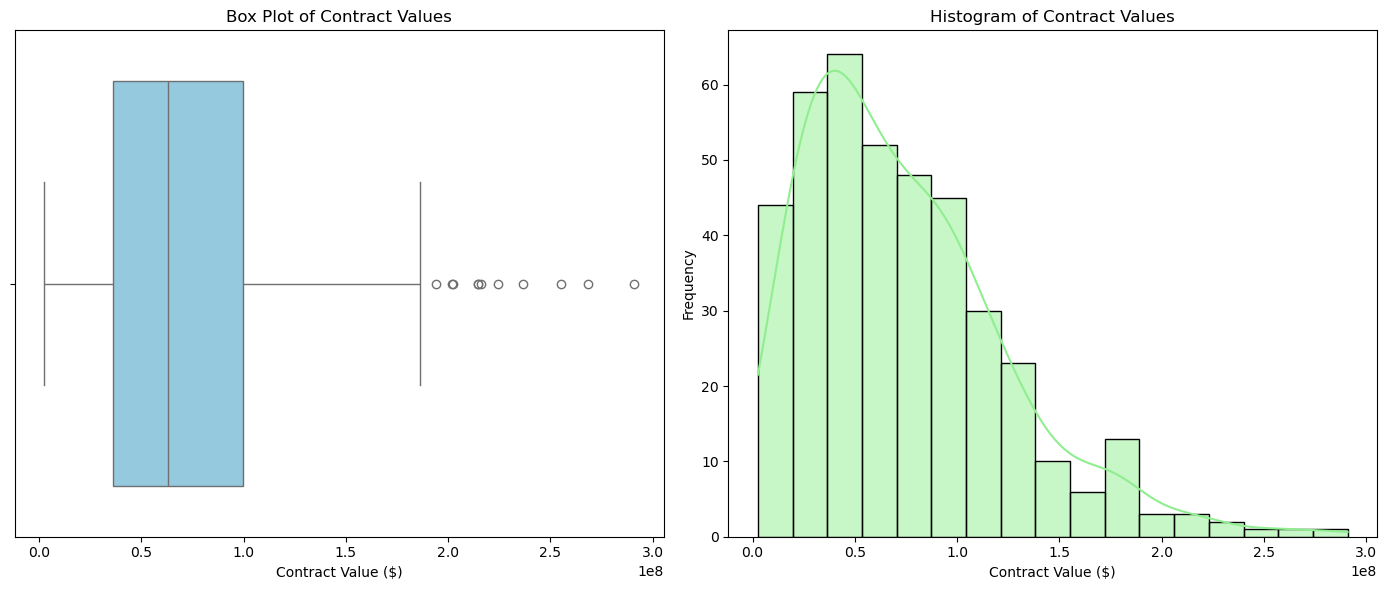

In [29]:
merged_df['All Contract Values'] = merged_df['All Contract Values'].replace({'$': '', ',': ''}, regex=True)

merged_df['All Contract Values'] = pd.to_numeric(merged_df['All Contract Values'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x=merged_df['All Contract Values'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Contract Values')
axes[0].set_xlabel('Contract Value ($)')

sns.histplot(merged_df['All Contract Values'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Histogram of Contract Values')
axes[1].set_xlabel('Contract Value ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Bivariate analysis with visualization

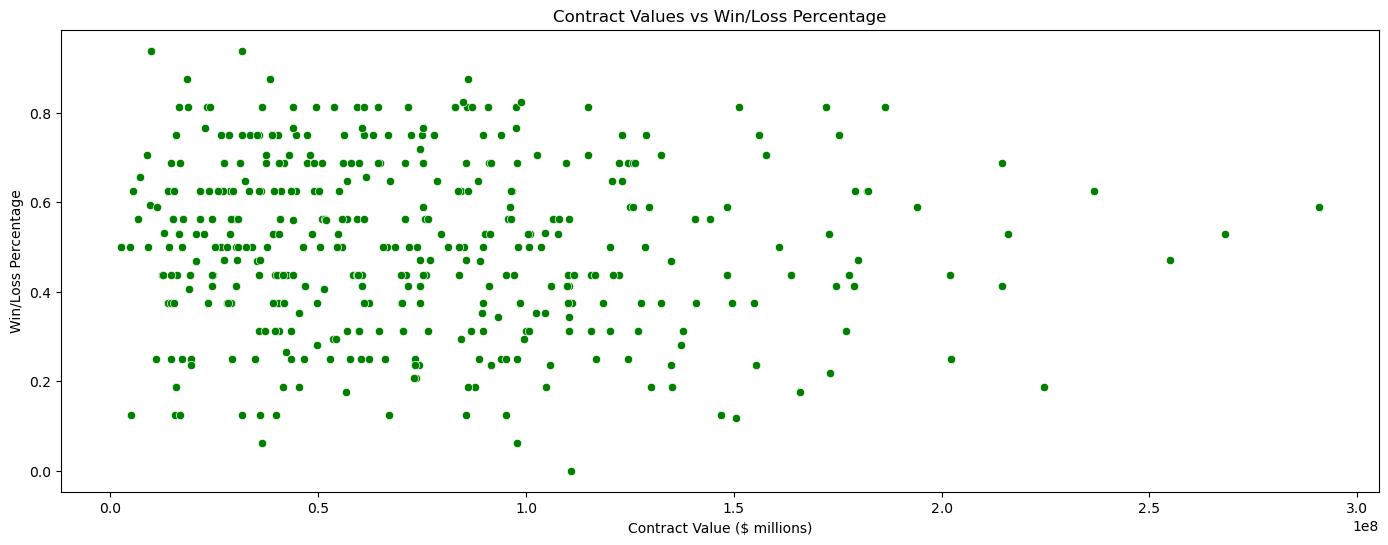

Correlation between Contract Values and Win/Loss Percentage: -0.07


In [67]:
plt.figure(figsize=(17,6))
sns.scatterplot(x='All Contract Values', y='win_loss_perc', data=merged_df, color='green')
plt.title('Contract Values vs Win/Loss Percentage')
plt.xlabel('Contract Value ($ millions)')
plt.ylabel('Win/Loss Percentage')
plt.show()

correlation = merged_df['All Contract Values'].corr(merged_df['win_loss_perc'])
print(f"Correlation between Contract Values and Win/Loss Percentage: {correlation:.2f}")

#### hypothesis test 

In [35]:
corr, p_value = pearsonr(merged_df['All Contract Values'], merged_df['win_loss_perc'])

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between free agent spending and team performance.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between free agent spending and team performance.")

Pearson Correlation Coefficient: -0.07
P-value: 0.1497
Fail to reject the null hypothesis: There is no significant correlation between free agent spending and team performance.


##### (Hypothesis: There is no direct correlation between free agent spending and team performance) this was our hypothesis before the test and it stands

## Machine Learning Test

In [45]:
merged_df['All Contract Values'] = merged_df['All Contract Values'].replace({'$': '', ',': ''}, regex=True)
merged_df['All Contract Values'] = pd.to_numeric(merged_df['All Contract Values'], errors='coerce')

X = merged_df[['All Contract Values']]  
y = merged_df['win_loss_perc']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R² Score: {r2:.2f}")

print(f"Linear Regression Coefficients: {model.coef_}")
print("For every unit increase in free agent spending, the Win/Loss Percentage is predicted to decrease by approximately 0.0125 (or 1.25%)")

print(f"Linear Regression Intercept: {model.intercept_}")
print("When a team spends no money on free agents, the model predicts that the Win/Loss Percentage would be approximately 49.65%")

Mean Absolute Error (MAE): 0.17
R² Score: -0.02
Linear Regression Coefficients: [-0.01246599]
For every unit increase in free agent spending, the Win/Loss Percentage is predicted to decrease by approximately 0.0125 (or 1.25%)
Linear Regression Intercept: 0.4964814814814814
When a team spends no money on free agents, the model predicts that the Win/Loss Percentage would be approximately 49.65%


### Key Takeaways:
##### - Poor Model Fit: The negative R² score suggests that the model is not useful for predicting Win/Loss Percentage based on free agent spending. 

##### - Weak Relationship: The coefficient is negative, but it is small (-0.0125), and given the low R² score, this relationship might not be meaningful or statistically significant.

##### - No Predictive Power: Given the results, free agent spending doesn't appear to have a strong predictive power for team performance in terms of Win/Loss Percentage. 

## Question 2) Is there a correlation between penalties committed by a team and its overall winning percentage? (Answered using univariate,bivariate, hypothesis testing, and visualizations) 

In [58]:
columns_to_include = ['year', 'team', 'wins', 'losses', 'points_diff', 'total_yards',
                      'yds_per_play_offense', 'turnovers', 'pass_cmp', 'pass_yds',
                      'rush_yds', 'penalties', 'win_loss_perc']

filtered_df = stats_df[columns_to_include]
filtered_df

,year,team,wins,losses,points_diff,total_yards,yds_per_play_offense,turnovers,pass_cmp,pass_yds,rush_yds,penalties,win_loss_perc
0,2003,New England Patriots,14,2,110,5039,4.8,24,320,3432,1607,111,0.875
1,2003,Miami Dolphins,10,6,50,4609,4.8,34,257,2792,1817,103,0.625
2,2003,Buffalo Bills,6,10,-36,4348,4.4,34,293,2684,1664,106,0.375
3,2003,New York Jets,6,10,-16,4951,5.3,20,312,3316,1635,69,0.375
4,2003,Baltimore Ravens,10,6,110,4929,4.9,38,217,2255,2674,126,0.625
5,2003,Cincinnati Bengals,8,8,-38,5329,5.1,22,324,3342,1987,107,0.500
6,2003,Pittsburgh Steelers,6,10,-27,4792,4.7,28,306,3304,1488,111,0.375
7,2003,Cleveland Browns,5,11,-68,4504,4.7,33,313,2834,1670,98,0.313
8,2003,Indianapolis Colts,12,4,111,5874,5.6,20,381,4179,1695,92,0.750
9,2003,Tennessee Titans,12,4,111,5501,5.4,21,315,3878,1623,110,0.750


In [59]:
print(filtered_df['penalties'].describe())
print(filtered_df['win_loss_perc'].describe())

count    672.000000
mean     101.494048
std       16.145851
min       55.000000
25%       91.000000
50%      102.000000
75%      112.000000
max      163.000000
Name: penalties, dtype: float64
count    672.000000
mean       0.500246
std        0.191452
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        1.000000
Name: win_loss_perc, dtype: float64


In [60]:
correlation = filtered_df['penalties'].corr(filtered_df['win_loss_perc'])
print(f"Correlation between penalties and winning %: {correlation:.3f}")

Correlation between penalties and winning %: -0.113


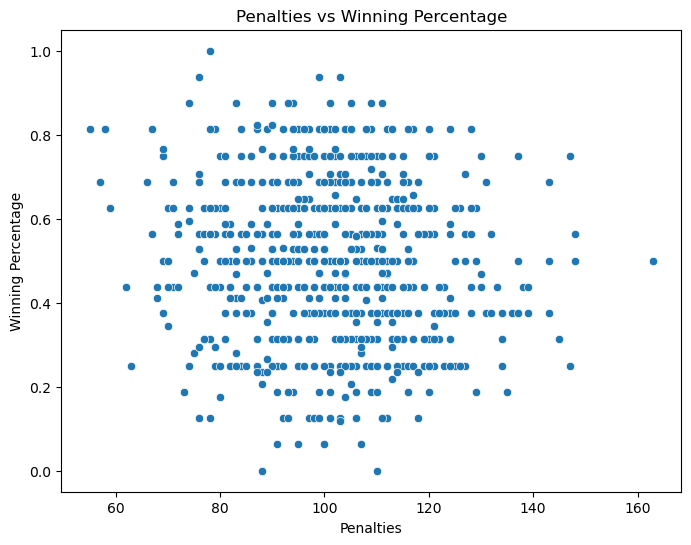

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='penalties', y='win_loss_perc')
plt.title('Penalties vs Winning Percentage')
plt.xlabel('Penalties')
plt.ylabel('Winning Percentage')
plt.show()

In [64]:
corr, p_value = pearsonr(filtered_df['penalties'], filtered_df['win_loss_perc'])
print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.11
P-value: 0.0034


In [63]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between penalties and winning percentage.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between penalties and winning percentage.")

Reject the null hypothesis: There is a significant correlation between penalties and winning percentage.


#### There is a significant correlation between penalties and winning percentage